In [12]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df=pd.read_csv("C:/Users/DELL/Downloads/mcdonalds.csv")

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
print(df.describe())

               Age
count  1453.000000
mean     44.604955
std      14.221178
min      18.000000
25%      33.000000
50%      45.000000
75%      57.000000
max      71.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [18]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


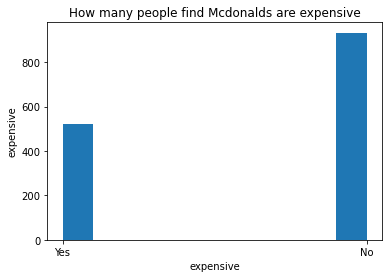

In [10]:
plt.hist(df['expensive'])
plt.xlabel('expensive')
plt.ylabel('expensive')
plt.title('How many people find Mcdonalds are expensive')
plt.show()

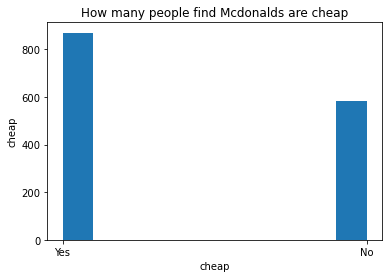

In [11]:
plt.hist(df['cheap'])
plt.xlabel('cheap')
plt.ylabel('cheap')
plt.title('How many people find Mcdonalds are cheap')
plt.show()

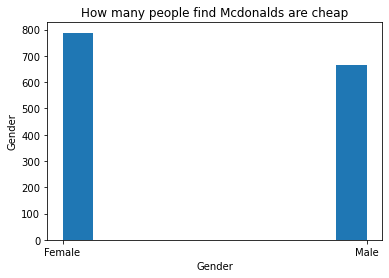

In [19]:
plt.hist(df['Gender'])
plt.xlabel('Gender')
plt.ylabel('Gender')
plt.title('How many people find Mcdonalds are cheap')
plt.show()

In [14]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)


Categorical Features : yummy convenient spicy fattening greasy fast cheap tasty expensive healthy disgusting VisitFrequency Gender
Numerical Features : Like Age


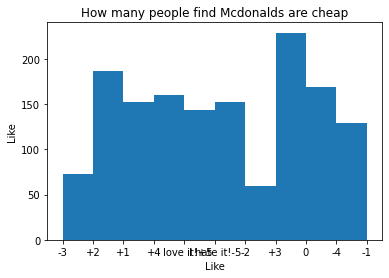

In [15]:
plt.hist(df['Like'])
plt.xlabel('Like')
plt.ylabel('Like')
plt.title('How many people find Mcdonalds are cheap')
plt.show()

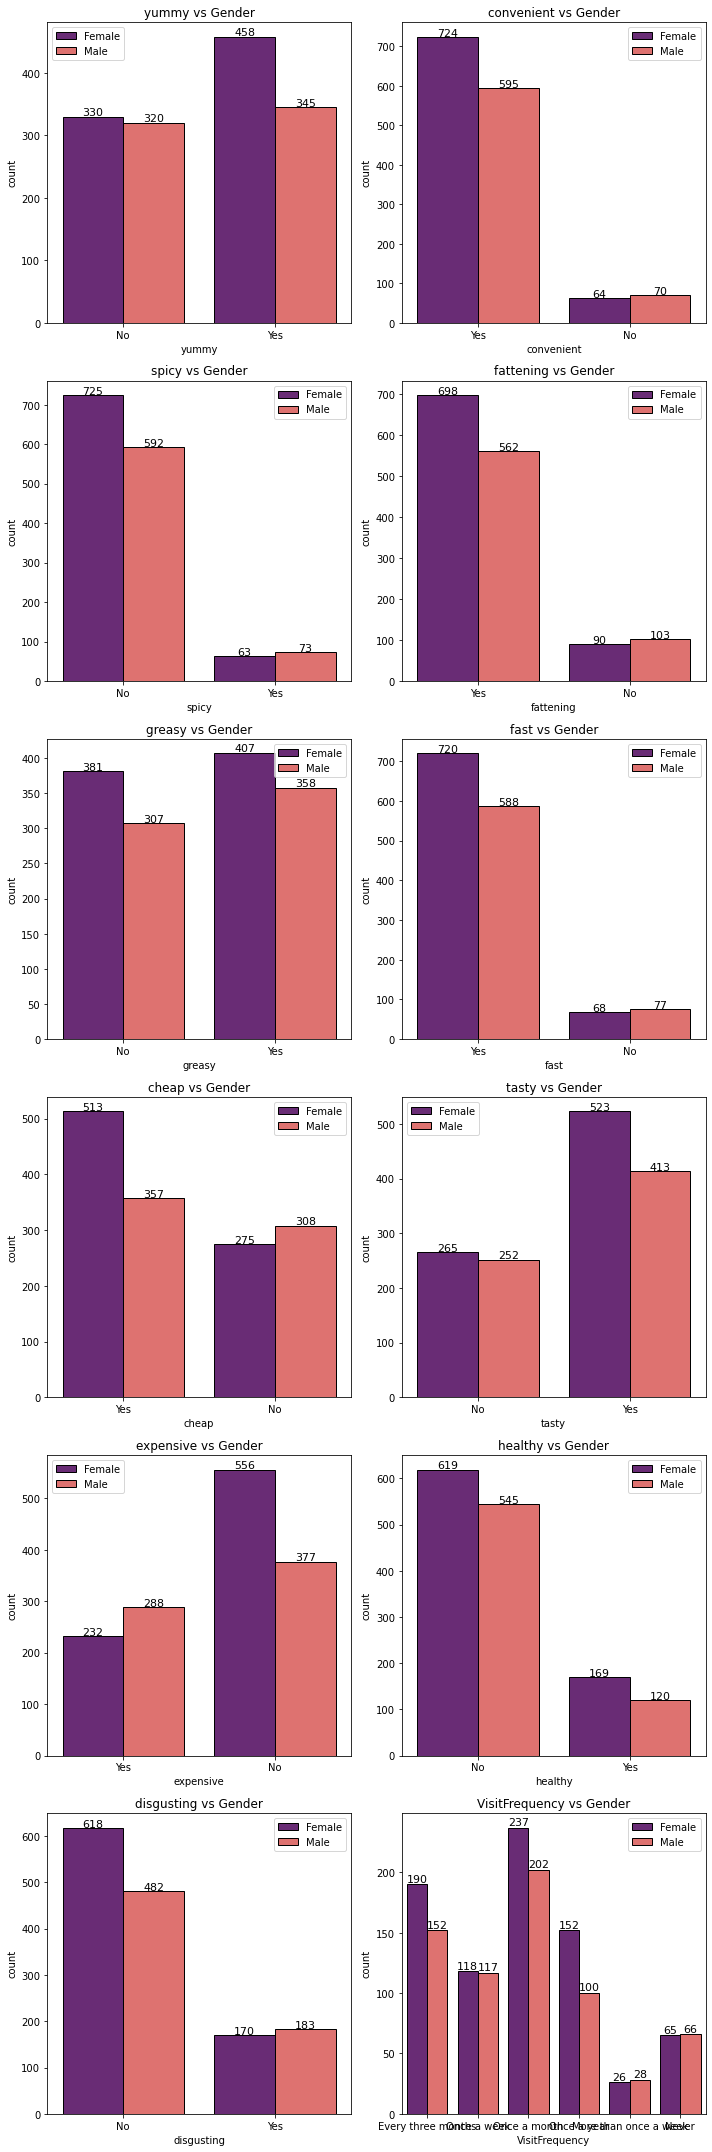

In [20]:
import math

num_features = len(categorical_features) - 1
num_rows = math.ceil(num_features / 2)

fig, ax = plt.subplots(nrows=num_rows, ncols=2, figsize=(10, 5 * num_rows))

for i in range(num_features):
    plt.subplot(num_rows, 2, i + 1)
    ax = sns.countplot(categorical_features[i], data=df, hue="Gender", palette='magma', edgecolor='black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
                horizontalalignment='center', fontsize=11)
    title = categorical_features[i] + ' vs Gender'
    plt.legend(['Female', 'Male'])
    plt.title(title)

plt.tight_layout()
plt.show()


In [27]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder

In [50]:
selected_columns = ['Age', 'yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'VisitFrequency', 'Gender']

In [51]:
categorical_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Gender']
data_encoded = pd.get_dummies(df[selected_columns], columns=categorical_columns)


In [34]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             1453 non-null   int64 
 1   VisitFrequency  1453 non-null   object
 2   yummy_No        1453 non-null   uint8 
 3   yummy_Yes       1453 non-null   uint8 
 4   convenient_No   1453 non-null   uint8 
 5   convenient_Yes  1453 non-null   uint8 
 6   spicy_No        1453 non-null   uint8 
 7   spicy_Yes       1453 non-null   uint8 
 8   fattening_No    1453 non-null   uint8 
 9   fattening_Yes   1453 non-null   uint8 
 10  greasy_No       1453 non-null   uint8 
 11  greasy_Yes      1453 non-null   uint8 
 12  fast_No         1453 non-null   uint8 
 13  fast_Yes        1453 non-null   uint8 
 14  cheap_No        1453 non-null   uint8 
 15  cheap_Yes       1453 non-null   uint8 
 16  tasty_No        1453 non-null   uint8 
 17  tasty_Yes       1453 non-null   uint8 
 18  expensiv

In [35]:
df['VisitFrequency'].unique()

array(['Every three months', 'Once a week', 'Once a month', 'Once a year',
       'More than once a week', 'Never'], dtype=object)

In [38]:
df['VisitFrequency'] = df['VisitFrequency'].map({'Never' : 0, 'Once a year' : 1,'Once a month' : 2,'Once a week' : 3, 'More than once a week' : 4 })

In [48]:
df.isnull().sum()


yummy               0
convenient          0
spicy               0
fattening           0
greasy              0
fast                0
cheap               0
tasty               0
expensive           0
healthy             0
disgusting          0
Like                0
Age                 0
VisitFrequency    342
Gender              0
dtype: int64

In [49]:
df['VisitFrequency'].fillna(df['VisitFrequency'].mode()[0], inplace=True)

# K-mean Clustering

In [44]:
num_clusters = 3

In [52]:
kmeans = KMeans(n_clusters=num_clusters)

In [53]:
kmeans.fit(data_encoded)

KMeans(n_clusters=3)

In [54]:
labels = kmeans.labels_

In [55]:
silhouette_avg = silhouette_score(data_encoded, labels)

In [56]:
print("The silhouette score is:", silhouette_avg)

The silhouette score is: 0.5127867472034063


# Gaussian Model Mixture

In [57]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score


In [58]:
gmm = GaussianMixture(n_components=3, random_state=42)


In [59]:
gmm.fit(data_encoded)


GaussianMixture(n_components=3, random_state=42)

In [61]:
labels = gmm.predict(data_encoded)

In [62]:
silhouette_avg = silhouette_score(data_encoded, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: -0.05153153833919281


# Decision Tree Classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
dt_classifier = DecisionTreeClassifier(random_state=42)

In [65]:
dt_classifier.fit(data_encoded, labels)

DecisionTreeClassifier(random_state=42)

# Comparison

In [66]:
from sklearn.model_selection import cross_val_score


In [68]:
kmeans_scores = cross_val_score(kmeans, data_encoded, labels, cv=5)
gmm_scores = cross_val_score(gmm, data_encoded, labels, cv=5)
dt_scores = cross_val_score(dt_classifier, data_encoded, labels, cv=5)

In [69]:
print("K-means Clustering - Average Score:", kmeans_scores.mean())
print("Gaussian Mixture Model - Average Score:", gmm_scores.mean())
print("Decision Tree Classifier - Average Score:", dt_scores.mean())


K-means Clustering - Average Score: -8645.111533368578
Gaussian Mixture Model - Average Score: 74.08249011678362
Decision Tree Classifier - Average Score: 1.0


It seems that the average score for K-means clustering (-8645.11) is significantly lower compared to the other two algorithms. This score suggests that K-means may not be the most suitable clustering algorithm for your dataset.

On the other hand, both the Gaussian Mixture Model (GMM) and Decision Tree Classifier have higher average scores. The GMM average score of 74.08 suggests a reasonably good fit for the data, while the Decision Tree Classifier's perfect score of 1.0 indicates that it is able to perfectly separate the data based on the given features.

Based on these results, it appears that the Decision Tree Classifier performs the best on dataset.